In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv('genres_v2.csv', low_memory = False)

# **Exploratory Data Analysis**

In [3]:
df_org = data_set.copy()

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
df_org.sample(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
4801          0.682   0.580   11    -7.966     1       0.2680      0.000848   
24455         0.955   0.684    8    -9.424     1       0.1110      0.001940   
25569         0.661   0.911    2    -8.819     1       0.0502      0.027400   
12517         0.491   0.888    5    -4.412     1       0.0380      0.004070   
9425          0.911   0.584    1    -8.333     1       0.1700      0.049600   
25036         0.614   0.921    7   -10.871     1       0.0803      0.006700   
20605         0.774   0.332    9    -9.014     1       0.0534      0.784000   
38366         0.715   0.576    4    -3.488     0       0.0636      0.008640   
41390         0.538   0.758    9    -2.773     0       0.0378      0.223000   
42167         0.404   0.895   10    -3.335     0       0.0381      0.004990   

       instrumentalness  liveness  valence  ...                      id  \
4801           0.049300    0.2900   0.6200  ...  4A21gWIRgx5Uid1ZHX0OhJ   
24455          0.673000    0.0858   0.5150  ...  42cpOxYtBSfLOMVfBiSxHx   
25569          0.871000    0.1110   0.0249  ...  5brdtsgtAnbz7urbD3L1cl   
12517          0.000000    0.2860   0.6560  ...  18IqyOGs1pRNZfbMo93r57   
9425           0.000000    0.2140   0.4590  ...  1yqpbhr6r7rYZ4T8fP84SP   
25036          0.920000    0.3520   0.1250  ...  1eOcu8q5AC8MvryEkGI4FU   
20605          0.000000    0.0701   0.5030  ...  2cc6lmnkgRd1DCksXjz6Cd   
38366          0.000280    0.0580   0.1560  ...  7rzjYyILDQGOAm8kBFrZoh   
41390          0.000000    0.2510   0.2500  ...  1ml3DHDWKMYaAjWy1NI5n2   
42167          0.000671    0.3650   0.3960  ...  33d77GI9t5PvKlyVUkykBh   

                                        uri  \
4801   spotify:track:4A21gWIRgx5Uid1ZHX0OhJ   
24455  spotify:track:42cpOxYtBSfLOMVfBiSxHx   
25569  spotify:track:5brdtsgtAnbz7urbD3L1cl   
12517  spotify:track:18IqyOGs1pRNZfbMo93r57   
9425   spotify:track:1yqpbhr6r7rYZ4T8fP84SP   
25036  spotify:track:1eOcu8q5AC8MvryEkGI4FU   
20605  spotify:track:2cc6lmnkgRd1DCksXjz6Cd   
38366  spotify:track:7rzjYyILDQGOAm8kBFrZoh   
41390  spotify:track:1ml3DHDWKMYaAjWy1NI5n2   
42167  spotify:track:33d77GI9t5PvKlyVUkykBh   

                                              track_href  \
4801   https://api.spotify.com/v1/tracks/4A21gWIRgx5U...   
24455  https://api.spotify.com/v1/tracks/42cpOxYtBSfL...   
25569  https://api.spotify.com/v1/tracks/5brdtsgtAnbz...   
12517  https://api.spotify.com/v1/tracks/18IqyOGs1pRN...   
9425   https://api.spotify.com/v1/tracks/1yqpbhr6r7rY...   
25036  https://api.spotify.com/v1/tracks/1eOcu8q5AC8M...   
20605  https://api.spotify.com/v1/tracks/2cc6lmnkgRd1...   
38366  https://api.spotify.com/v1/tracks/7rzjYyILDQGO...   
41390  https://api.spotify.com/v1/tracks/1ml3DHDWKMYa...   
42167  https://api.spotify.com/v1/tracks/33d77GI9t5Pv...   

                                            analysis_url duration_ms  \
4801   https://api.spotify.com/v1/audio-analysis/4A21...      171334   
24455  https://api.spotify.com/v1/audio-analysis/42cp...      386058   
25569  https://api.spotify.com/v1/audio-analysis/5brd...      419033   
12517  https://api.spotify.com/v1/audio-analysis/18Iq...      220027   
9425   https://api.spotify.com/v1/audio-analysis/1yqp...      124355   
25036  https://api.spotify.com/v1/audio-analysis/1eOc...      445440   
20605  https://api.spotify.com/v1/audio-analysis/2cc6...      149344   
38366  https://api.spotify.com/v1/audio-analysis/7rzj...      289655   
41390  https://api.spotify.com/v1/audio-analysis/1ml3...      196216   
42167  https://api.spotify.com/v1/audio-analysis/33d7...      214937   

      time_signature            genre  song_name Unnamed: 0  \
4801               4  Underground Rap    Wake Up        NaN   
24455              4        techhouse        NaN     2955.0   
25569              3           techno        NaN     4088.0   
12517              4              Emo  Sweetness        NaN   
9425               4  Un

In [6]:
df = df_org.drop(['id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'], axis = 1)

In [7]:
df.sample(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
25307         0.726   0.815    8    -6.288     1       0.0564      0.002030   
40008         0.292   0.893    9    -3.158     0       0.0622      0.048600   
24139         0.823   0.804   10    -7.586     0       0.0437      0.000928   
22061         0.806   0.851    9    -7.961     1       0.0602      0.000332   
29736         0.591   0.934    1    -4.383     0       0.1000      0.002380   
19847         0.611   0.752    8    -4.438     1       0.2780      0.221000   
16417         0.615   0.514   11    -9.759     1       0.0466      0.393000   
25764         0.747   0.878    1    -6.864     1       0.2570      0.004780   
19584         0.776   0.503    0    -5.732     0       0.2370      0.874000   
36673         0.527   0.944    8    -6.366     1       0.0835      0.000999   

       instrumentalness  liveness  valence    tempo            type  \
25307          0.862000    0.6850   0.2340  125.022  audio_features   
40008          0.000029    0.2670   0.0890  149.964  audio_features   
24139          0.933000    0.0706   0.0394  126.005  audio_features   
22061          0.887000    0.0336   0.7150  125.989  audio_features   
29736          0.011600    0.1620   0.0817  129.973  audio_features   
19847          0.000012    0.0956   0.6170  111.878  audio_features   
16417          0.000000    0.2480   0.8220  175.849  audio_features   
25764          0.095200    0.3740   0.7340  123.059  audio_features   
19584          0.000000    0.1120   0.4730  110.134  audio_features   
36673          0.865000    0.1420   0.0323  174.990  audio_features   

       duration_ms  time_signature      genre  
25307       397438               4     techno  
40008       193500               3  hardstyle  
24139       344963               4  techhouse  
22061       455637               4  techhouse  
29736       218884               4     trance  
19847       189893               5     Hiphop  
16417       260667               4        RnB  
25764       224878               4     techno  
19584       210285               4     Hiphop  
36673       290943               4        dnb

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  duration_ms       42305 non-null  int64  
 13  time_signature    42305 non-null  int64  
 14  genre             42305 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 4.8+ MB


In [9]:
df['type'].value_counts()

type
audio_features    42305
Name: count, dtype: int64

In [10]:
df = df.drop('type', axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
 13  genre             42305 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 4.5+ MB


In [12]:
int_columns = df.select_dtypes('int').columns
df[int_columns] = df[int_columns].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  float64
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  float64
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  float64
 12  time_signature    42305 non-null  float64
 13  genre             42305 non-null  object 
dtypes: float64(13), object(1)
memory usage: 4.5+ MB


### **Outlier Analysis**

In [14]:
numeric_columns = df.select_dtypes(include = 'number').columns
n_cols = 5
n_rows = int(np.ceil(len(numeric_columns)/n_cols))
n_rows

3

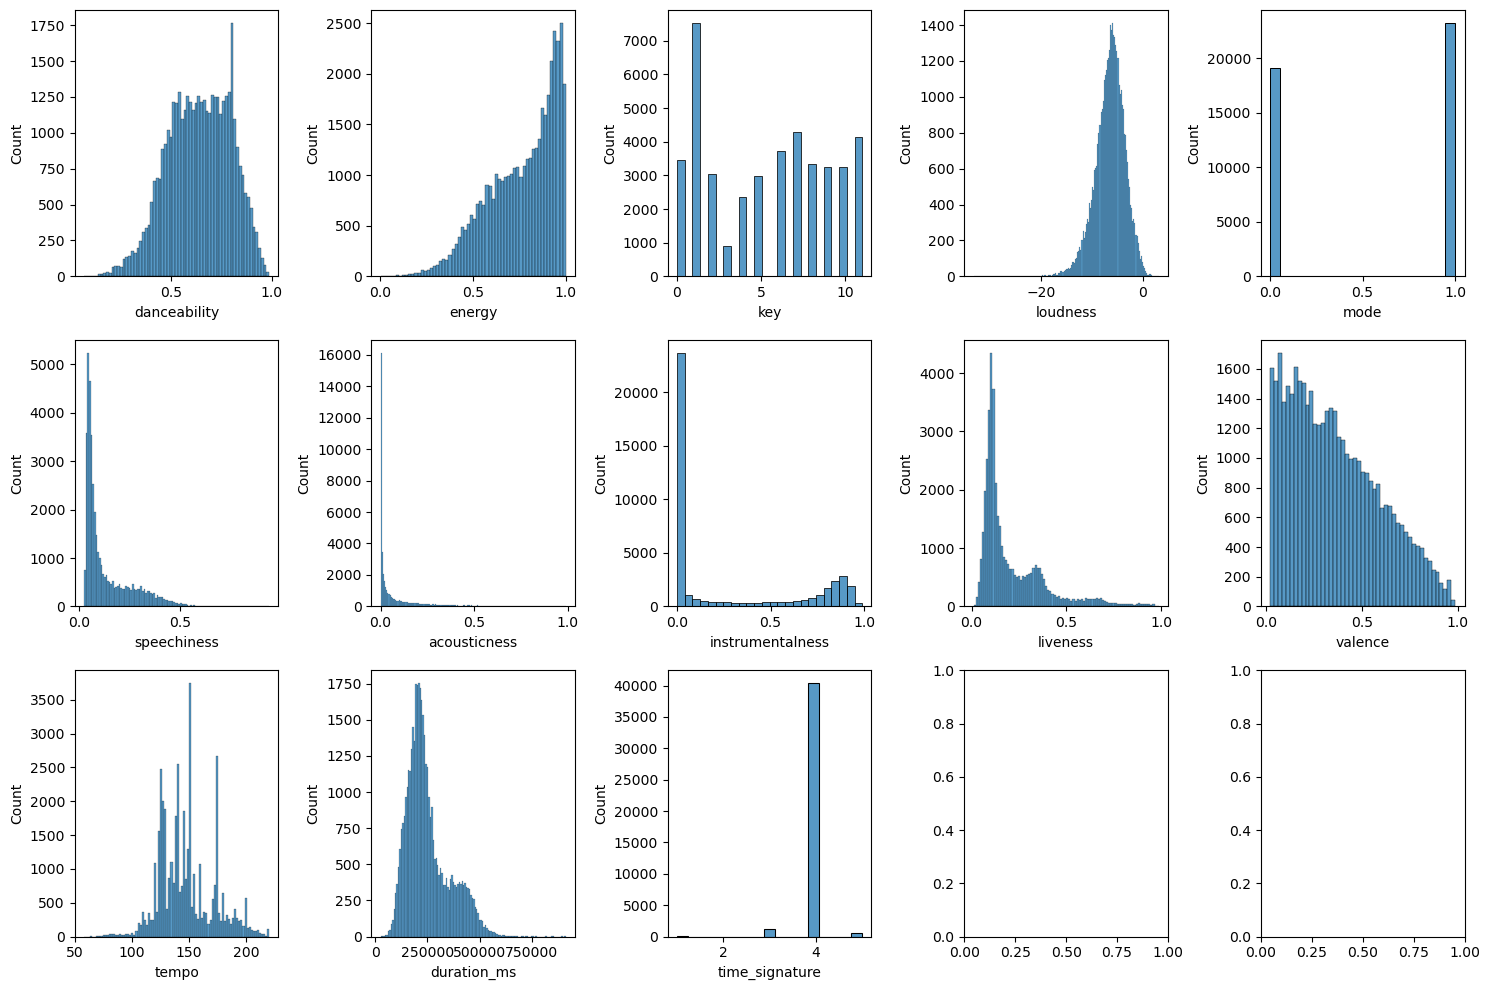

In [15]:
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15,10))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax = axes[i])
plt.tight_layout()
plt.show()

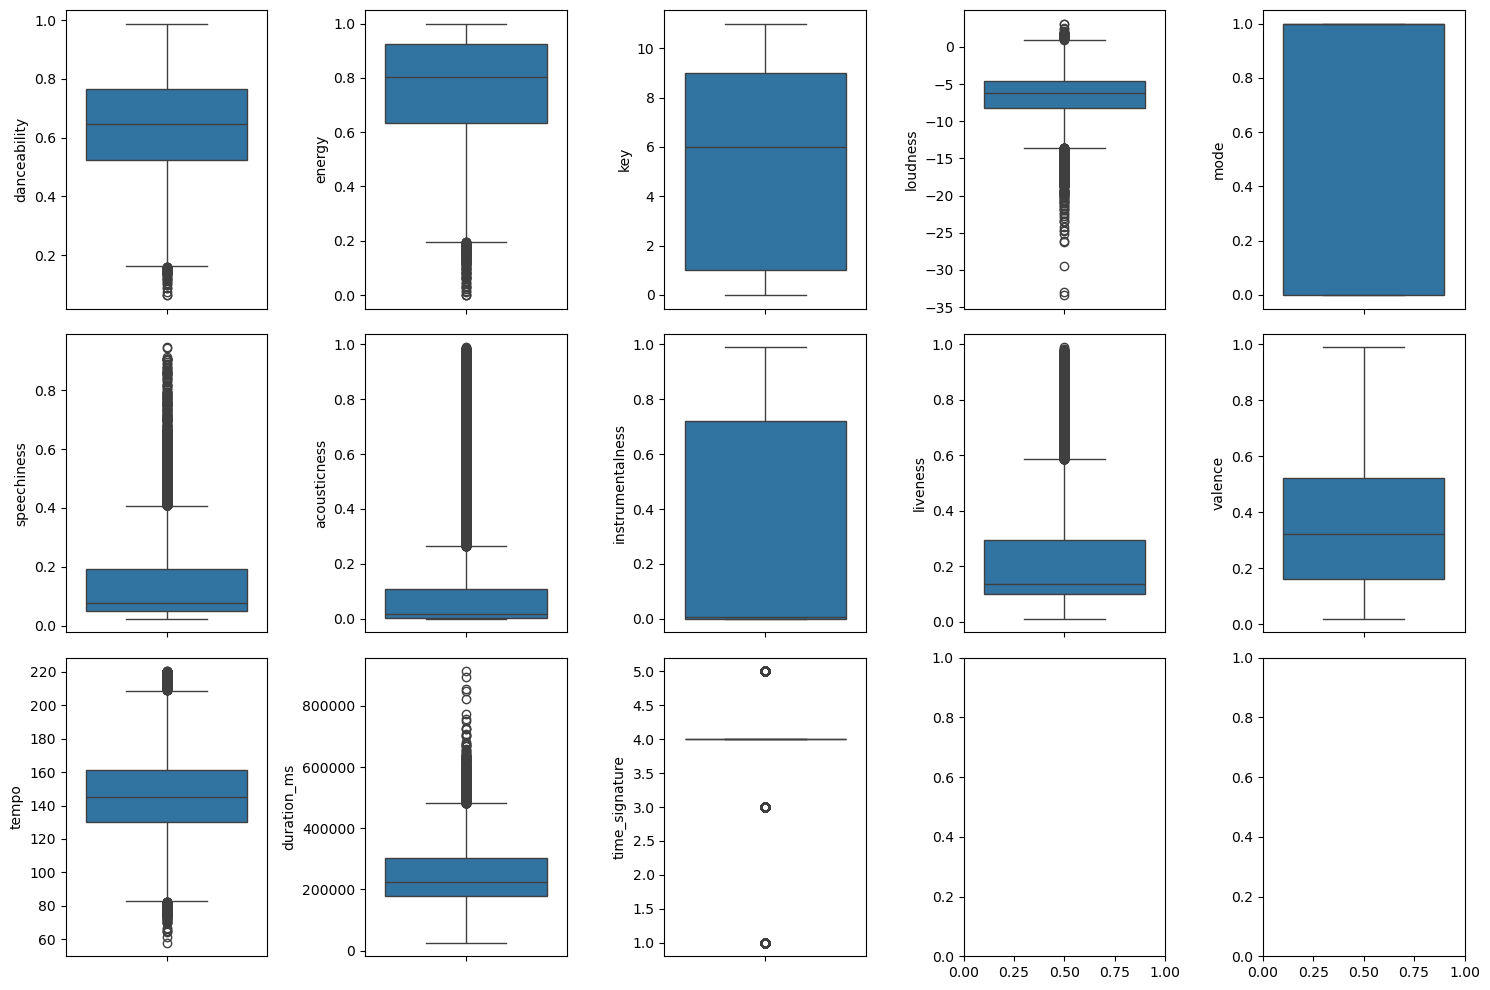

In [16]:
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15,10))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.boxplot(df[col], ax = axes[i])
plt.tight_layout()
plt.show()

In [17]:
outliers = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values

for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

danceability: 45 outliers
energy: 139 outliers
key: 0 outliers
loudness: 796 outliers
mode: 0 outliers
speechiness: 1918 outliers
acousticness: 5149 outliers
instrumentalness: 0 outliers
liveness: 2496 outliers
valence: 0 outliers
tempo: 532 outliers
duration_ms: 1220 outliers
time_signature: 1878 outliers


#### **energy column**

In [18]:
df['energy'].sort_values(ascending = True).head(50)

2239     0.000243
11425    0.000243
3080     0.000602
3367     0.012700
13312    0.014800
2890     0.022300
19620    0.027900
19617    0.027900
13329    0.029700
3370     0.032100
13272    0.039300
3987     0.045300
13325    0.048500
13478    0.058700
13324    0.059600
17919    0.060900
19633    0.062500
20175    0.066800
20054    0.066800
18801    0.067100
13316    0.072300
20274    0.075900
10560    0.078200
13504    0.080800
19623    0.081300
13440    0.084800
1867     0.085500
18033    0.086400
13382    0.093500
3073     0.094400
17905    0.095200
19392    0.095300
16753    0.097800
1367     0.098700
13495    0.102000
20611    0.108000
2579     0.109000
3476     0.111000
13480    0.113000
444      0.114000
17922    0.116000
20402    0.117000
13346    0.119000
17034    0.120000
20371    0.120000
3353     0.121000
13422    0.122000
13485    0.122000
16595    0.123000
20509    0.124000
Name: energy, dtype: float64

In [19]:
cond1 = df['energy'] < 0.2
df.loc[cond1, 'energy'] = np.nan

In [20]:
df['energy'].isnull().sum()

np.int64(147)

In [21]:
df['energy'] = df['energy'].fillna(df['energy'].median())

In [22]:
df['energy'].isnull().sum()

np.int64(0)

<Axes: xlabel='energy', ylabel='Count'>

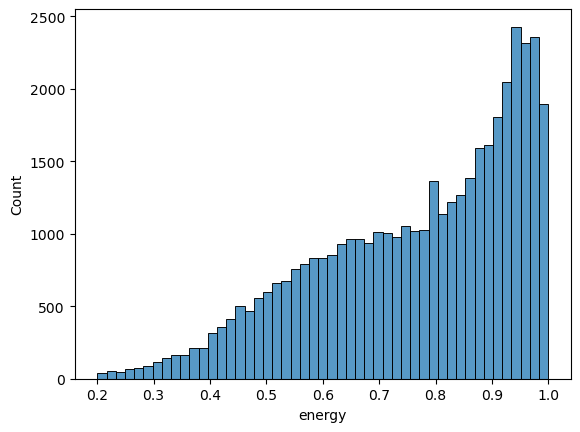

In [23]:
sns.histplot(df['energy'])

<Axes: ylabel='energy'>

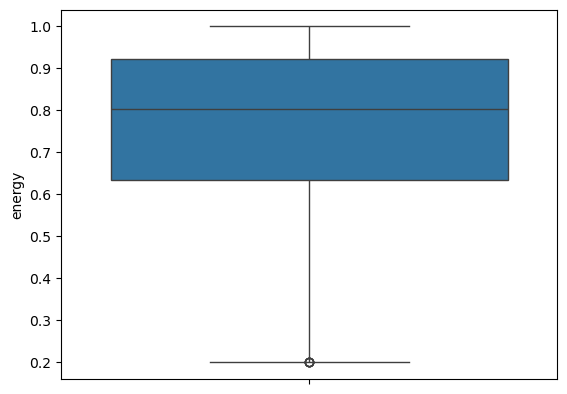

In [24]:
sns.boxplot(df['energy'])

In [25]:
outliers = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values

# Display outlier counts for each column
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

danceability: 45 outliers
energy: 5 outliers
key: 0 outliers
loudness: 796 outliers
mode: 0 outliers
speechiness: 1918 outliers
acousticness: 5149 outliers
instrumentalness: 0 outliers
liveness: 2496 outliers
valence: 0 outliers
tempo: 532 outliers
duration_ms: 1220 outliers
time_signature: 1878 outliers


Outliers reduced from 139 to 5 for the energy column

#### **loudness column**

In [26]:
df['loudness'].value_counts()

loudness
-6.142     20
-6.186     20
-5.943     19
-5.892     19
-5.319     17
           ..
-1.761      1
-3.052      1
-9.782      1
-1.810      1
-10.946     1
Name: count, Length: 11654, dtype: int64

In [27]:
df['loudness'].sort_values(ascending = True).head(60)

10964   -33.357
13312   -32.929
17919   -29.478
25568   -26.172
13504   -26.113
3370    -25.222
19633   -24.694
13272   -24.563
2754    -24.203
25552   -23.577
20509   -23.390
890     -23.385
1367    -23.035
21984   -22.714
26820   -22.534
19620   -22.282
19617   -21.992
19634   -21.867
24568   -21.758
8420    -21.657
3739    -21.420
13420   -21.398
3448    -21.319
3710    -21.030
430     -21.006
17803   -20.883
4254    -20.791
19287   -20.749
19623   -20.627
20611   -20.585
12042   -20.343
2890    -20.306
6342    -20.149
22096   -20.073
5400    -20.032
9233    -19.993
20787   -19.876
3535    -19.816
3367    -19.741
14508   -19.720
3885    -19.716
29624   -19.708
3025    -19.684
28764   -19.645
3423    -19.642
6765    -19.459
3854    -19.450
1317    -19.410
3352    -19.404
2887    -19.374
11488   -19.345
7186    -19.345
25682   -19.344
5848    -19.329
3746    -19.218
6429    -19.212
3727    -18.853
6967    -18.813
6316    -18.812
13445   -18.725
Name: loudness, dtype: float64

In [28]:
cond2 = df['loudness'] < -13
df.loc[cond2, 'loudness'] = np.nan

In [29]:
df['loudness'].isnull().sum()

np.int64(1014)

In [30]:
df['loudness'] = df['loudness'].fillna(df['loudness'].median())

In [31]:
df['loudness'].isnull().sum()

np.int64(0)

<Axes: xlabel='loudness', ylabel='Count'>

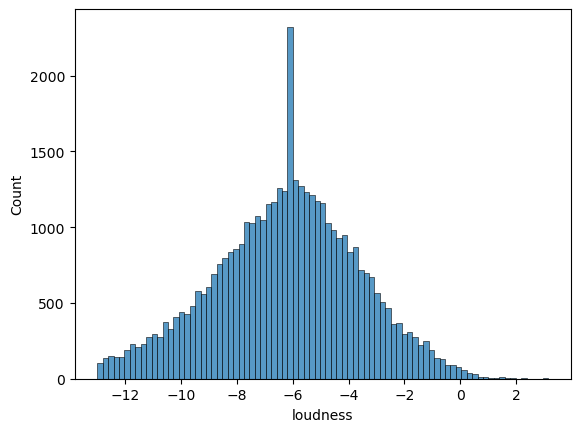

In [32]:
sns.histplot(df['loudness'])

<Axes: ylabel='loudness'>

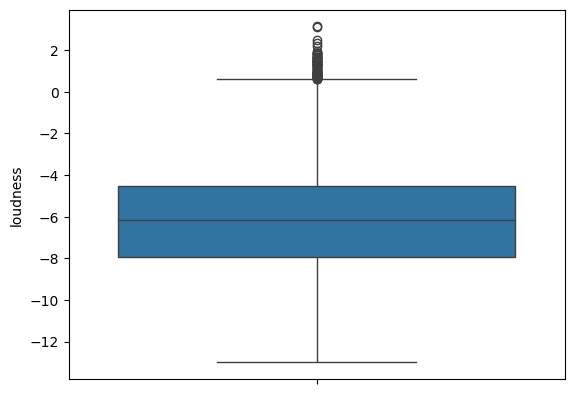

In [33]:
sns.boxplot(df['loudness'])

In [34]:
outliers = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values

# Display outlier counts for each column
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

danceability: 45 outliers
energy: 5 outliers
key: 0 outliers
loudness: 74 outliers
mode: 0 outliers
speechiness: 1918 outliers
acousticness: 5149 outliers
instrumentalness: 0 outliers
liveness: 2496 outliers
valence: 0 outliers
tempo: 532 outliers
duration_ms: 1220 outliers
time_signature: 1878 outliers


Outliers reduced from 796 to 74 for the loudness column

#### **speechiness column**

In [35]:
df['speechiness'].sort_values(ascending = False).head(100)

3265     0.946
18977    0.944
6300     0.914
7342     0.908
10652    0.908
         ...  
20202    0.720
35543    0.716
9814     0.716
20084    0.712
35856    0.712
Name: speechiness, Length: 100, dtype: float64

In [36]:
df['speechiness'].median()

0.0755

In [37]:
cond3 = df['speechiness'] > 0.4
df.loc[cond3, 'speechiness'] = 0.4

In [38]:
df['speechiness'].isnull().sum()

np.int64(0)

<Axes: ylabel='speechiness'>

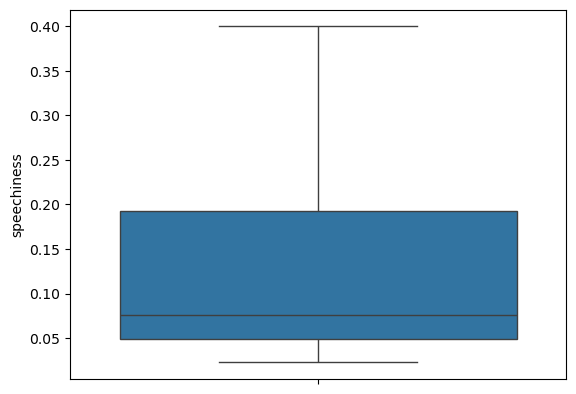

In [39]:
sns.boxplot(df['speechiness'])

<Axes: xlabel='speechiness', ylabel='Count'>

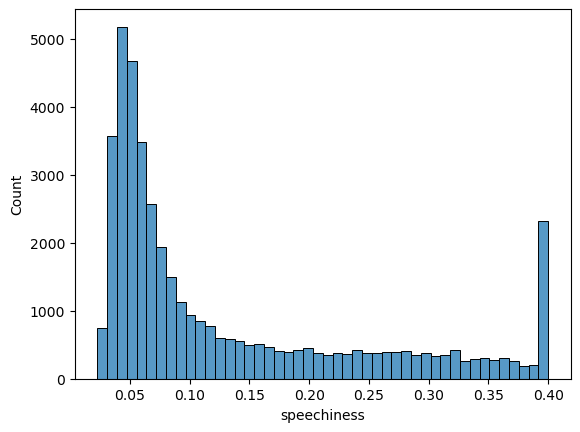

In [40]:
sns.histplot(df['speechiness'])

In [41]:
df['speechiness'].median()

0.0755

In [42]:
outliers = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values

# Display outlier counts for each column
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

danceability: 45 outliers
energy: 5 outliers
key: 0 outliers
loudness: 74 outliers
mode: 0 outliers
speechiness: 0 outliers
acousticness: 5149 outliers
instrumentalness: 0 outliers
liveness: 2496 outliers
valence: 0 outliers
tempo: 532 outliers
duration_ms: 1220 outliers
time_signature: 1878 outliers


Outliers reduced from 1918 to 0 for the speechiness column

#### **acousticness column**

In [43]:
df['acousticness'].median()

0.0164

In [44]:
cond4 = df['acousticness'] > 0.25

In [45]:
df.loc[cond4, 'acousticness'] = 0.25

<Axes: xlabel='acousticness', ylabel='Count'>

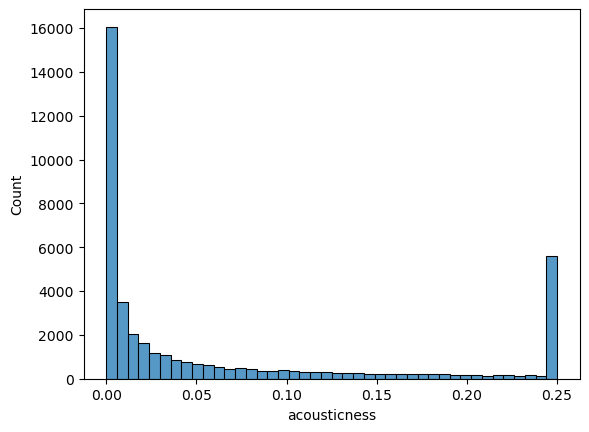

In [46]:
sns.histplot(df['acousticness'])

<Axes: ylabel='acousticness'>

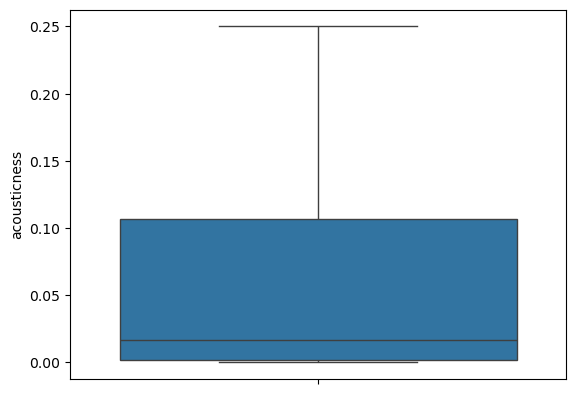

In [47]:
sns.boxplot(df['acousticness'])

In [48]:
df['acousticness'].median()

0.0164

In [49]:
outliers = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values

# Display outlier counts for each column
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

danceability: 45 outliers
energy: 5 outliers
key: 0 outliers
loudness: 74 outliers
mode: 0 outliers
speechiness: 0 outliers
acousticness: 0 outliers
instrumentalness: 0 outliers
liveness: 2496 outliers
valence: 0 outliers
tempo: 532 outliers
duration_ms: 1220 outliers
time_signature: 1878 outliers


Outliers reduced from 5149 to 0 for the acousticness column

#### **liveness column**

In [50]:
cond5 = df['liveness'] > 0.6
df.loc[cond5, 'liveness'] = np.nan

In [51]:
df['liveness'] = df['liveness'].fillna(df.groupby(['energy', 'loudness', 'danceability'])['liveness'].transform('median'))
df['liveness'] = df['liveness'].fillna(df.groupby(['energy', 'loudness'])['liveness'].transform('median'))
df['liveness'] = df['liveness'].fillna(df.groupby('energy')['liveness'].transform('median'))
df['liveness'] = df['liveness'].fillna(df['liveness'].median())

<Axes: xlabel='liveness', ylabel='Count'>

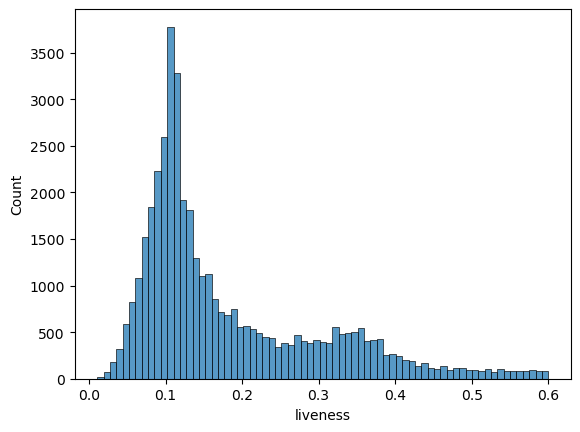

In [52]:
sns.histplot(df['liveness'])

<Axes: ylabel='liveness'>

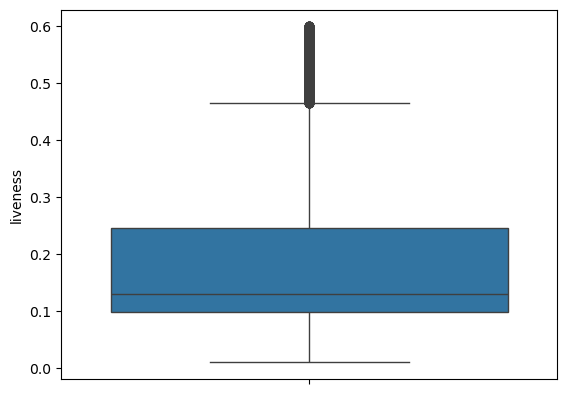

In [53]:
sns.boxplot(df['liveness'])

In [54]:
outliers = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values

# Display outlier counts for each column
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

danceability: 45 outliers
energy: 5 outliers
key: 0 outliers
loudness: 74 outliers
mode: 0 outliers
speechiness: 0 outliers
acousticness: 0 outliers
instrumentalness: 0 outliers
liveness: 1494 outliers
valence: 0 outliers
tempo: 532 outliers
duration_ms: 1220 outliers
time_signature: 1878 outliers


Outliers reduced from 2496 to 1494

#### **tempo column**

In [55]:
cond6 = ((df['tempo'] < 80) | (df['tempo'] > 210))
df.loc[cond6, 'tempo'] = np.nan

In [56]:
df['tempo'] = df['tempo'].fillna(df['tempo'].median())

<Axes: xlabel='tempo', ylabel='Count'>

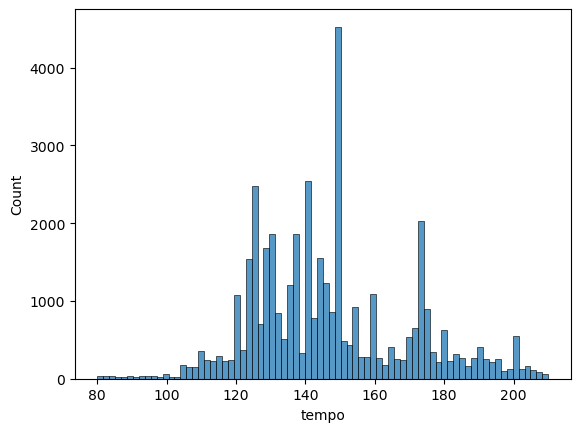

In [57]:
sns.histplot(df['tempo'])

<Axes: ylabel='tempo'>

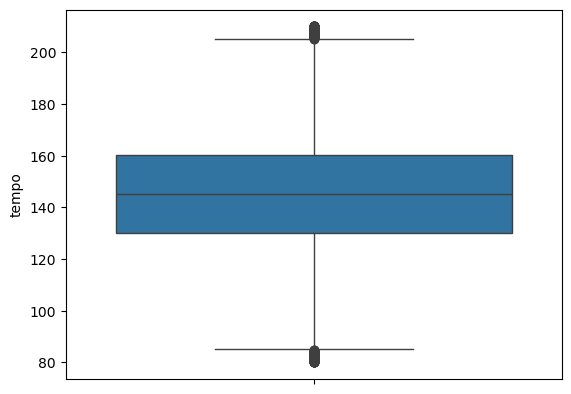

In [58]:
sns.boxplot(df['tempo'])

In [59]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values

# Display outlier counts for each column
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

danceability: 45 outliers
energy: 5 outliers
key: 0 outliers
loudness: 74 outliers
mode: 0 outliers
speechiness: 0 outliers
acousticness: 0 outliers
instrumentalness: 0 outliers
liveness: 1494 outliers
valence: 0 outliers
tempo: 329 outliers
duration_ms: 1220 outliers
time_signature: 1878 outliers


Outliers reduced from 532 to 329 for the tempo column

#### **duration_ms column**

In [60]:
cond7 = df['duration_ms'] > 500000
df.loc[cond7, 'duration_ms'] = np.nan

In [61]:
df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].median())

<Axes: xlabel='duration_ms', ylabel='Count'>

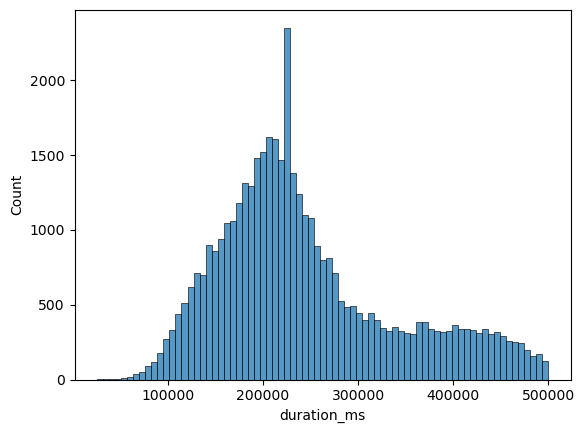

In [62]:
sns.histplot(df['duration_ms'])

<Axes: ylabel='duration_ms'>

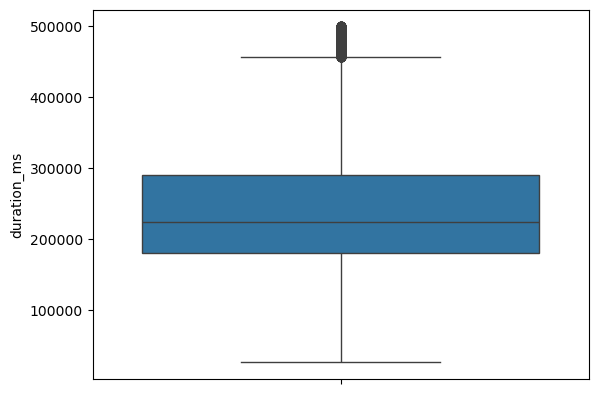

In [63]:
sns.boxplot(df['duration_ms'])

In [64]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values

# Display outlier counts for each column
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

danceability: 45 outliers
energy: 5 outliers
key: 0 outliers
loudness: 74 outliers
mode: 0 outliers
speechiness: 0 outliers
acousticness: 0 outliers
instrumentalness: 0 outliers
liveness: 1494 outliers
valence: 0 outliers
tempo: 329 outliers
duration_ms: 1347 outliers
time_signature: 1878 outliers


Outlier number has not reduced but increased from 1220 to 1347 for the duration_ms column

#### **Pair Plots**

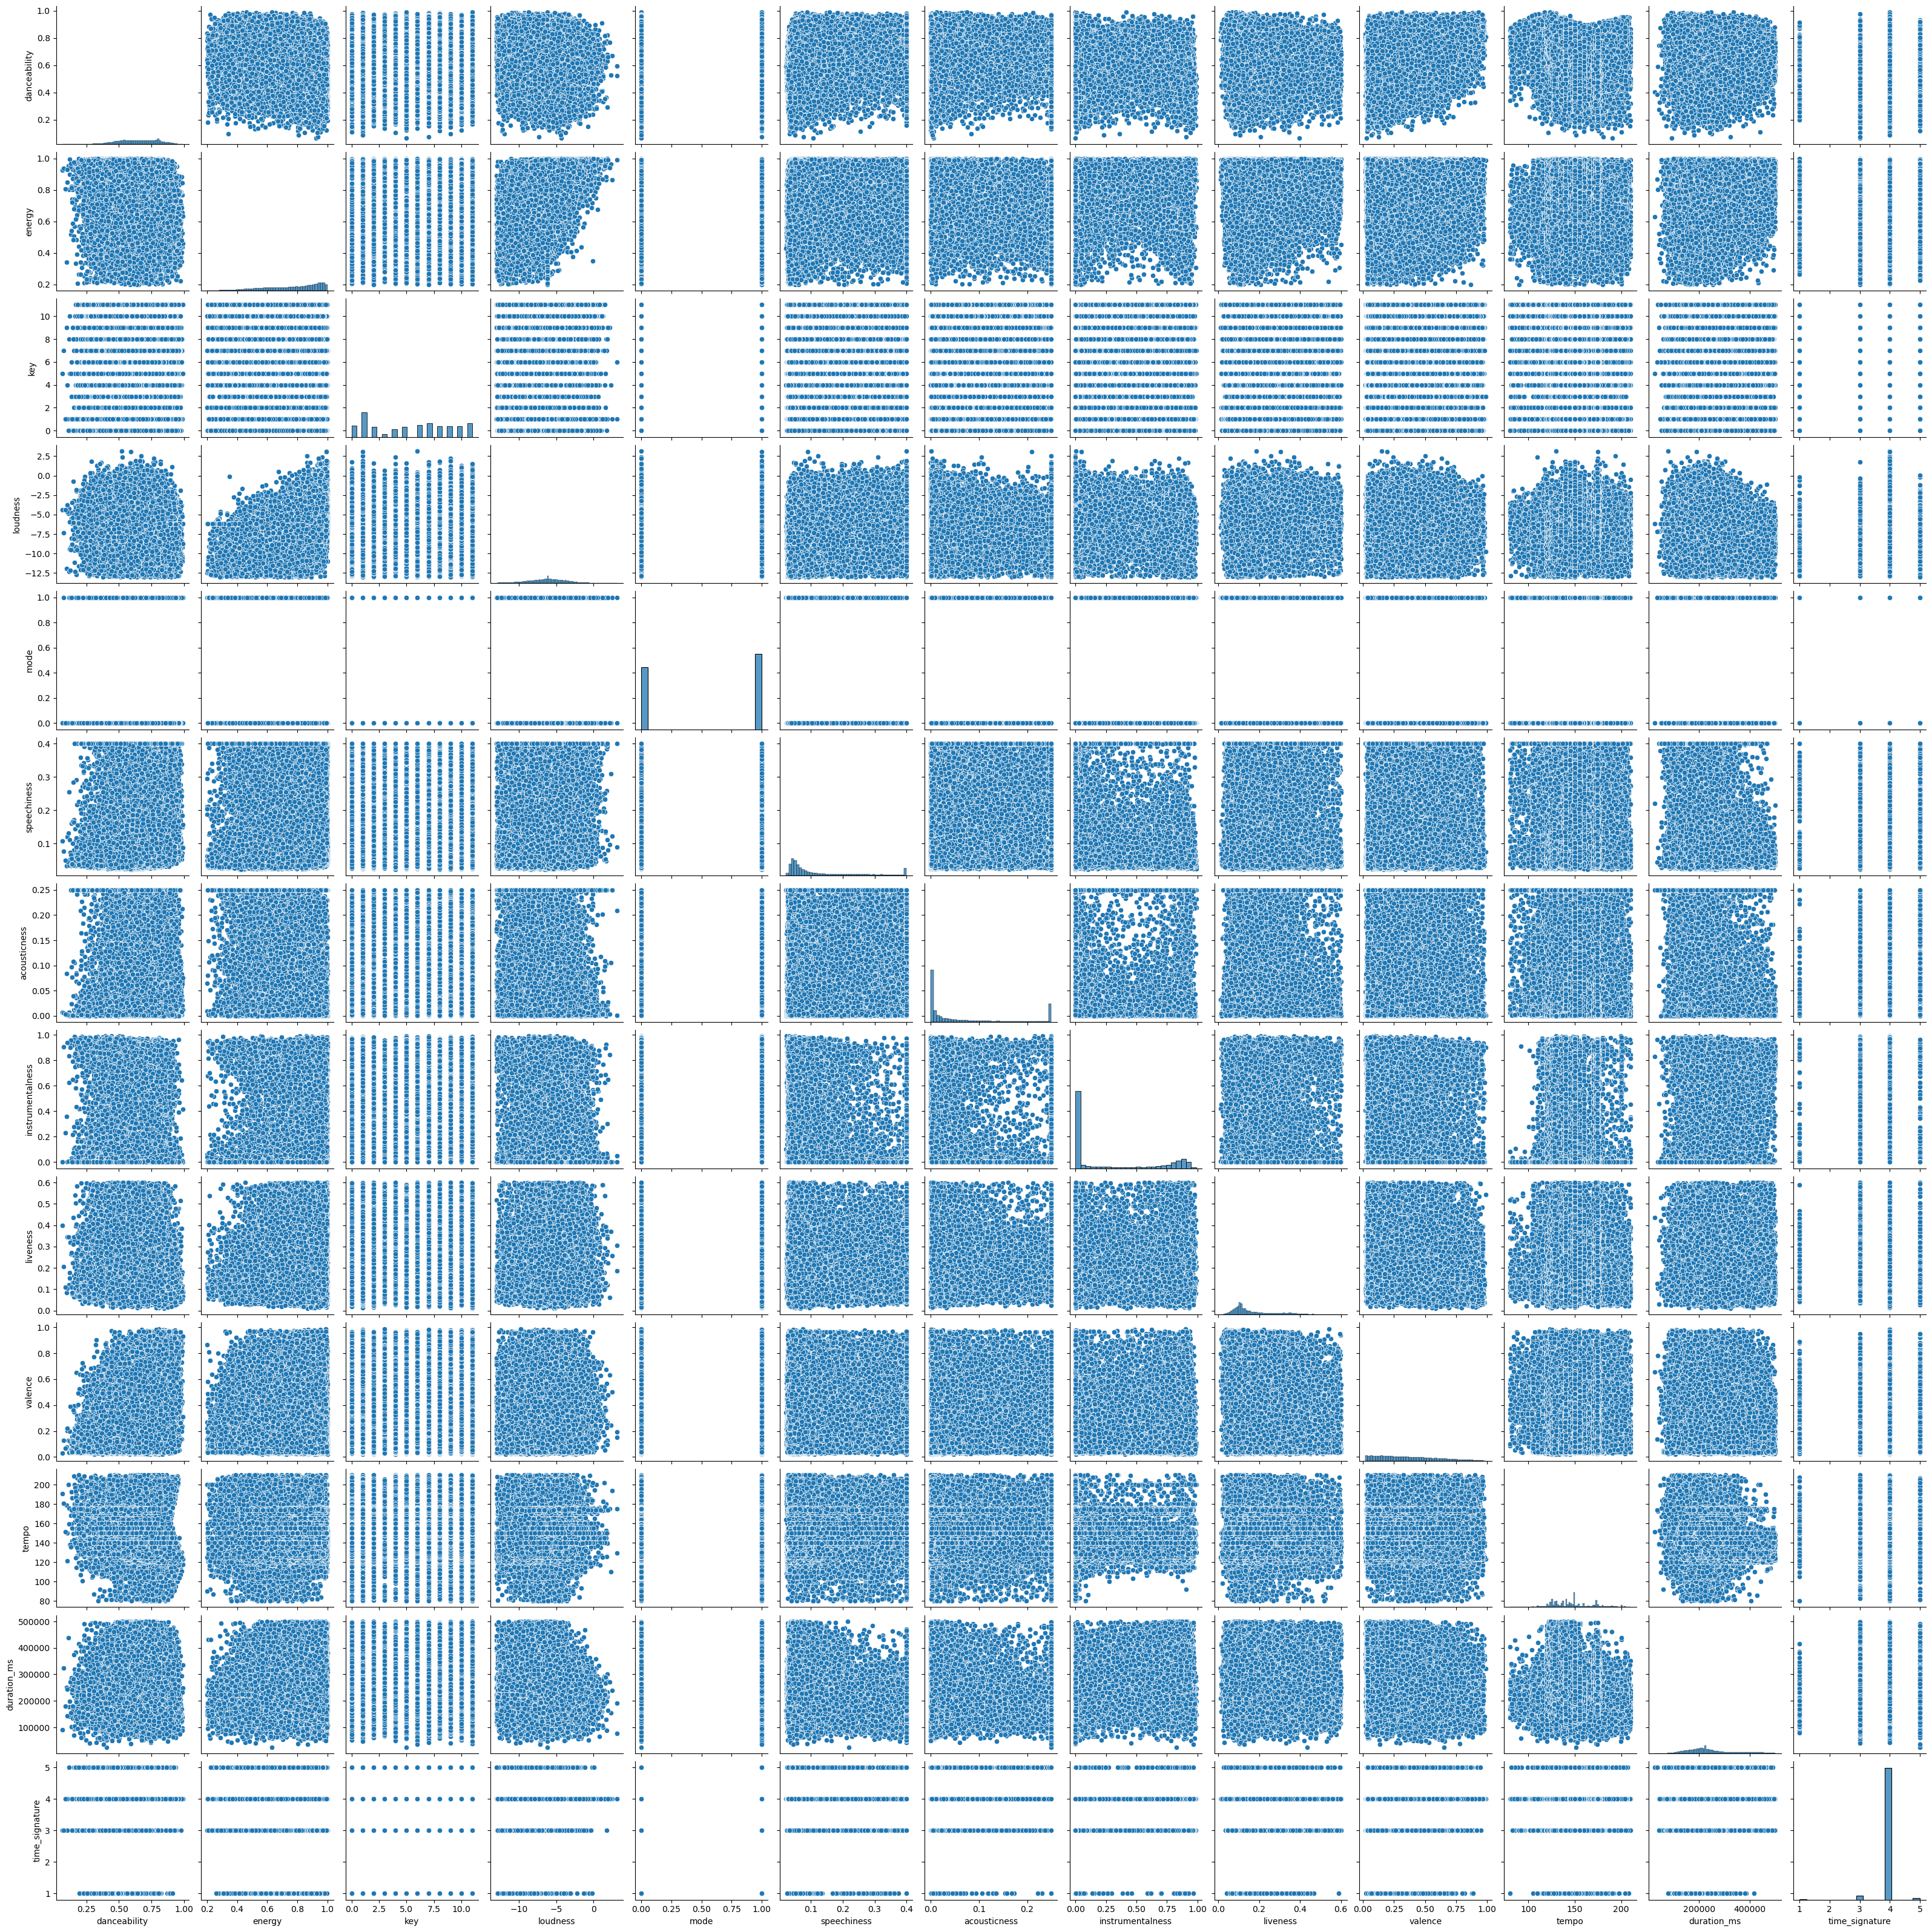

In [65]:
sns.pairplot(df)
plt.show()

#### **Label Encoding**

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])

In [67]:
df[['genre', 'genre_encoded']].sample(20)

genre  genre_encoded
6273   Underground Rap              7
35888             trap             14
38065              dnb              8
18366              Pop              3
27769           trance             13
11535       Trap Metal              6
15631              Rap              4
30167           trance             13
10357  Underground Rap              7
17367              RnB              5
24469        techhouse             11
21173           Hiphop              2
23502        techhouse             11
34995             trap             14
4517         Dark Trap              0
8670   Underground Rap              7
35598             trap             14
31488        psytrance             10
17870              RnB              5
8030   Underground Rap              7

In [68]:
df = df.sample(4000)

# **Train Test Split**

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
X = df.drop(['genre', 'genre_encoded'], axis = 1)
y = df['genre_encoded']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200, 13), (800, 13), (3200,), (800,))

In [73]:
y.value_counts()

genre_encoded
7     558
0     425
2     305
13    301
10    287
12    285
8     280
14    274
9     268
11    263
5     191
4     185
6     170
1     164
3      44
Name: count, dtype: int64

In [74]:
X_train.sample(20)

danceability  energy   key  loudness  mode  speechiness  acousticness  \
20945         0.809   0.811   5.0    -6.412   1.0       0.2690      0.004690   
13405         0.535   0.414   8.0    -2.259   1.0       0.0346      0.250000   
8972          0.769   0.829   0.0    -5.228   1.0       0.0661      0.009480   
31329         0.678   0.981   4.0    -6.814   1.0       0.0705      0.003790   
8168          0.564   0.591   4.0    -7.277   0.0       0.2390      0.250000   
4390          0.458   0.928   9.0    -6.199   1.0       0.0912      0.000148   
35661         0.674   0.740   1.0    -6.949   1.0       0.2120      0.056000   
10275         0.701   0.645   8.0    -3.084   0.0       0.1640      0.027400   
12326         0.861   0.937   6.0    -4.474   1.0       0.1810      0.022200   
5180          0.699   0.624   1.0    -8.618   1.0       0.0529      0.088400   
40307         0.446   0.950  10.0    -3.764   0.0       0.0995      0.001560   
7440          0.867   0.492   2.0    -8.088   1.0       0.2790      0.250000   
19232         0.865   0.836   1.0    -6.088   1.0       0.2250      0.003720   
38463         0.424   0.921   4.0    -3.174   0.0       0.0427      0.001180   
21062         0.652   0.814   1.0    -4.901   1.0       0.3100      0.164000   
24997         0.720   0.819   7.0    -7.916   1.0       0.0459      0.004200   
27483         0.420   0.945   0.0    -6.538   1.0       0.1770      0.003580   
32247         0.473   0.846   7.0    -7.082   1.0       0.0543      0.008680   
24727         0.710   0.905   9.0   -11.194   1.0       0.0661      0.039900   
28982         0.504   0.998   4.0    -4.483   1.0       0.1590      0.000317   

       instrumentalness  liveness  valence    tempo  duration_ms  \
20945          0.000019    0.0946   0.7660  104.035     161538.0   
13405          0.000000    0.1060   0.2210  153.568     143529.0   
8972           0.000067    0.3010   0.6480  159.943     100291.0   
31329          0.811000    0.2280   0.0823  138.000     223272.5   
8168           0.003290    0.0999   0.0768  139.820     264243.0   
4390           0.287000    0.2920   0.2050  165.031     170182.0   
35661          0.369000    0.2740   0.7080  160.206     217594.0   
10275          0.000174    0.3270   0.5760  107.955     191904.0   
12326          0.017600    0.1110   0.7040  145.108     170400.0   
5180           0.014200    0.3940   0.2240  137.997     103170.0   
40307          0.027900    0.3280   0.3490  149.856     319000.0   
7440           0.000000    0.2880   0.5670  120.981     155482.0   
19232          0.005510    0.3010   0.2480  205.508     311507.0   
38463          0.008170    0.3280   0.0973  174.986     197486.0   
21062          0.000000    0.3600   0.7880  183.776     275893.0   
24997          0.915000    0.1090   0.0353  132.990     364795.0   
27483          0.006330    0.2480   0.1380  135.839     228321.0   
32247          0.798000    0.0969   0.0526  145.018     445241.0   
24727          0.782000    0.1090   0.1880  129.020     316414.0   
28982          0.104000    0.1370   0.1600  137.995     447826.0   

       time_signature  
20945             4.0  
13405             3.0  
8972              4.0  
31329             4.0  
8168              4.0  
4390              4.0  
35661             4.0  
10275             3.0  
12326             4.0  
5180              4.0  
40307             4.0  
7440              4.0  
19232             4.0  
38463             4.0  
21062             4.0  
24997             4.0  
27483             4.0  
32247             4.0  
24727             4.0  
28982             4.0

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [76]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# **Logistic Regression**

In [77]:
logr = LogisticRegression(max_iter = 5000)
logr.fit(X_train_sc, y_train)

LogisticRegression(max_iter=5000)

In [78]:
logr.score(X_train_sc, y_train), logr.score(X_test_sc, y_test)

(0.5903125, 0.5475)

In [79]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print()
    print("Train_Set")
    # print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    # print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [80]:
eval_metric(logr, X_train_sc, y_train, X_test_sc, y_test)


Train_Set
              precision    recall  f1-score   support

           0       0.47      0.42      0.44       351
           1       0.40      0.45      0.42       125
           2       0.47      0.40      0.43       241
           3       0.00      0.00      0.00        36
           4       0.41      0.25      0.31       145
           5       0.45      0.31      0.37       149
           6       0.48      0.23      0.31       142
           7       0.46      0.66      0.54       435
           8       0.80      0.88      0.84       223
           9       0.62      0.63      0.62       218
          10       0.78      0.78      0.78       236
          11       0.73      0.79      0.76       216
          12       0.77      0.81      0.79       220
          13       0.63      0.68      0.65       244
          14       0.68      0.70      0.69       219

    accuracy                           0.59      3200
   macro avg       0.54      0.53      0.53      3200
weighted avg   

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Cross Validation**

In [81]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, StratifiedKFold
scoring = {
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': 'accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logr_cv = cross_validate(logr, X_train_sc, y_train, scoring = scoring, cv = cv, return_train_score = True)

In [82]:
logr_cv_df = pd.DataFrame(logr_cv, index = range(1,6))
logr_cv_df

fit_time  score_time  test_precision  train_precision  test_recall  \
1  0.096366    0.011296        0.545988         0.539347     0.526886   
2  0.116723    0.010480        0.495563         0.549806     0.502189   
3  0.102822    0.010825        0.487184         0.545169     0.484054   
4  0.096667    0.010401        0.549035         0.535546     0.539487   
5  0.109153    0.010551        0.505209         0.542170     0.481906   

   train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1      0.529613  0.526213  0.527016       0.585938        0.587891  
2      0.538735  0.487533  0.537866       0.559375        0.595703  
3      0.538490  0.478917  0.535456       0.539062        0.595703  
4      0.527964  0.538368  0.525417       0.596875        0.585156  
5      0.533814  0.480585  0.531174       0.545312        0.592187

In [83]:
logr_cv_df.mean()[2:]

test_precision     0.516596
train_precision    0.542408
test_recall        0.506904
train_recall       0.533723
test_f1            0.502323
train_f1           0.531386
test_accuracy      0.565312
train_accuracy     0.591328
dtype: float64

### **GridSearch**

In [84]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'max_iter': [10000],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'lbfgs', 'saga', 'sag'],
              'class_weight': [None, 'balanced']}
logr_grid = GridSearchCV(logr, param_grid = param_grid, cv =5, n_jobs = -1)
logr_grid.fit(X_train_sc, y_train)

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver =

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga', 'sag']})

In [85]:
logr_grid.best_score_, logr_grid.best_params_

(np.float64(0.5700000000000001),
 {'C': 10,
  'class_weight': None,
  'max_iter': 10000,
  'penalty': 'l2',
  'solver': 'lbfgs'})

In [86]:
logr_grid.score(X_train_sc, y_train), logr_grid.score(X_test_sc, y_test)

(0.591875, 0.5575)

In [87]:
eval_metric(logr_grid, X_train_sc, y_train, X_test_sc, y_test)


Train_Set
              precision    recall  f1-score   support

           0       0.47      0.42      0.44       351
           1       0.42      0.47      0.44       125
           2       0.47      0.40      0.43       241
           3       0.00      0.00      0.00        36
           4       0.42      0.26      0.32       145
           5       0.45      0.31      0.37       149
           6       0.45      0.23      0.30       142
           7       0.46      0.66      0.54       435
           8       0.80      0.88      0.84       223
           9       0.62      0.63      0.62       218
          10       0.79      0.80      0.79       236
          11       0.74      0.79      0.77       216
          12       0.78      0.81      0.79       220
          13       0.63      0.68      0.65       244
          14       0.68      0.70      0.69       219

    accuracy                           0.59      3200
   macro avg       0.54      0.54      0.53      3200
weighted avg   

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [88]:
logr_all_results = {
    'Regular': {
        'Train Accuracy': logr.score(X_train_sc, y_train),
        'Test Accuracy': logr.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, logr.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, logr.predict(X_test_sc), average='macro')
    },
    'Cross-Validation': {
        'Train Accuracy': logr_cv['train_accuracy'].mean(),
        'CV Accuracy Score': logr_cv['test_accuracy'].mean(),
        'CV Precision Score': logr_cv['test_precision'].mean(),
        'CV Recall Score': logr_cv['test_recall'].mean()
    },
    'Grid Search': {
        'Train Accuracy': logr_grid.score(X_train_sc, y_train),
        'Test Accuracy': logr_grid.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, logr_grid.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, logr_grid.predict(X_test_sc), average='macro'),
        'Best Score': logr_grid.best_score_
    }
}
logr_all_results

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Regular': {'Train Accuracy': 0.5903125,
  'Test Accuracy': 0.5475,
  'Test Precision': 0.49818963149461776,
  'Test Recall': 0.4950243145212838},
 'Cross-Validation': {'Train Accuracy': np.float64(0.591328125),
  'CV Accuracy Score': np.float64(0.5653125),
  'CV Precision Score': np.float64(0.5165957241814466),
  'CV Recall Score': np.float64(0.5069042038898562)},
 'Grid Search': {'Train Accuracy': 0.591875,
  'Test Accuracy': 0.5575,
  'Test Precision': 0.5055670875479458,
  'Test Recall': 0.5060468190635252,
  'Best Score': np.float64(0.5700000000000001)}}

# **Support Vectors**

In [89]:
from sklearn.svm import SVC

In [90]:
svm = SVC() # class_weight = 'balanced' but it gives better results without it
svm.fit(X_train_sc, y_train)

SVC()

In [91]:
svm.score(X_train_sc, y_train), svm.score(X_test_sc, y_test)

(0.689375, 0.58625)

In [92]:
eval_metric(svm, X_train_sc, y_train, X_test_sc, y_test)


Train_Set
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       351
           1       0.60      0.62      0.61       125
           2       0.58      0.55      0.56       241
           3       0.00      0.00      0.00        36
           4       0.75      0.28      0.41       145
           5       0.56      0.37      0.45       149
           6       0.85      0.25      0.38       142
           7       0.49      0.82      0.61       435
           8       0.91      0.96      0.94       223
           9       0.78      0.83      0.80       218
          10       0.84      0.84      0.84       236
          11       0.79      0.87      0.82       216
          12       0.82      0.83      0.83       220
          13       0.73      0.80      0.77       244
          14       0.86      0.77      0.81       219

    accuracy                           0.69      3200
   macro avg       0.68      0.62      0.63      3200
weighted avg   

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packag

### **Cross Validate**

In [93]:
scoring = {
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': 'accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_cv = cross_validate(svm, X_train_sc, y_train, scoring = scoring, cv = cv, return_train_score = True)

In [94]:
svm_cv_df = pd.DataFrame(svm_cv, index = range(1,6))
svm_cv_df

fit_time  score_time  test_precision  train_precision  test_recall  \
1  0.265165    0.097512        0.586160         0.681464     0.521201   
2  0.130729    0.103535        0.569031         0.688406     0.516195   
3  0.171095    0.098065        0.537480         0.676655     0.530239   
4  0.160972    0.095588        0.539741         0.678635     0.529814   
5  0.132101    0.097276        0.571220         0.684046     0.499201   

   train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1      0.617149  0.525070  0.624499       0.590625        0.689063  
2      0.616616  0.516439  0.625230       0.585938        0.689063  
3      0.621233  0.525091  0.627327       0.596875        0.690625  
4      0.615997  0.521478  0.625277       0.604688        0.687109  
5      0.629805  0.501890  0.635629       0.560937        0.699219

In [95]:
svm_cv_df.mean()[2:]

test_precision     0.560726
train_precision    0.681841
test_recall        0.519330
train_recall       0.620160
test_f1            0.517993
train_f1           0.627592
test_accuracy      0.587812
train_accuracy     0.691016
dtype: float64

### **GridSearch**

In [96]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}
svm_grid = GridSearchCV(svm, param_grid = param_grid, cv = 5, n_jobs = -1)
svm_grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [97]:
svm_grid.best_score_, svm_grid.best_params_

(np.float64(0.606875), {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'})

In [98]:
svm_all_results = {
    'Regular': {
        'Train Accuracy': svm.score(X_train_sc, y_train),
        'Test Accuracy': svm.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, svm.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, svm.predict(X_test_sc), average='macro')
    },
    'Cross-Validation': {
        'Train Accuracy': svm_cv['train_accuracy'].mean(),
        'CV Accuracy Score': svm_cv['test_accuracy'].mean(),
        'CV Precision Score': svm_cv['test_precision'].mean(),
        'CV Recall Score': svm_cv['test_recall'].mean()
    },
    'Grid Search': {
        'Train Accuracy': svm_grid.score(X_train_sc, y_train),
        'Test Accuracy': svm_grid.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, svm_grid.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, svm_grid.predict(X_test_sc), average='macro'),
        'Best Score': svm_grid.best_score_
    }

}
svm_all_results

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Regular': {'Train Accuracy': 0.689375,
  'Test Accuracy': 0.58625,
  'Test Precision': 0.5373977064576447,
  'Test Recall': 0.5153700876279791},
 'Cross-Validation': {'Train Accuracy': np.float64(0.691015625),
  'CV Accuracy Score': np.float64(0.5878125),
  'CV Precision Score': np.float64(0.5607263727214737),
  'CV Recall Score': np.float64(0.5193299472747456)},
 'Grid Search': {'Train Accuracy': 0.6728125,
  'Test Accuracy': 0.59625,
  'Test Precision': 0.5623654402654688,
  'Test Recall': 0.5375089156614403,
  'Best Score': np.float64(0.606875)}}

# **Decision Trees**

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt = DecisionTreeClassifier(random_state = 42)

In [117]:
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [118]:
dt.score(X_train_sc, y_train), dt.score(X_test_sc, y_test)

(0.994375, 0.55625)

In [221]:
dt_feature_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
dt_feature_importances

danceability        0.099290
energy              0.064246
key                 0.031428
loudness            0.070688
mode                0.008593
speechiness         0.062923
acousticness        0.046293
instrumentalness    0.095305
liveness            0.042932
valence             0.079424
tempo               0.255602
duration_ms         0.142594
time_signature      0.000683
dtype: float64

### **Cross Validate**

In [119]:
scoring = {
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': 'accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv = cross_validate(dt, X_train_sc, y_train, scoring = scoring, cv = cv, return_train_score = True)

In [120]:
dt_cv_df = pd.DataFrame(dt_cv, index = range(1,6))
dt_cv_df

fit_time  score_time  test_precision  train_precision  test_recall  \
1  0.047795    0.009489        0.515073         0.995769     0.501524   
2  0.043582    0.010885        0.485022         0.995766     0.476556   
3  0.056479    0.010442        0.507188         0.996025     0.502684   
4  0.038641    0.005352        0.478437         0.997374     0.487475   
5  0.046993    0.010471        0.486783         0.995404     0.479128   

   train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1      0.995209  0.506430  0.995447       0.531250        0.994922  
2      0.994439  0.475625  0.995057       0.520312        0.995313  
3      0.995253  0.502814  0.995600       0.532813        0.996484  
4      0.994466  0.481941  0.995879       0.517188        0.996484  
5      0.996208  0.481680  0.995778       0.517188        0.994922

In [121]:
dt_cv_df.mean()[2:]

test_precision     0.494501
train_precision    0.996068
test_recall        0.489473
train_recall       0.995115
test_f1            0.489698
train_f1           0.995552
test_accuracy      0.523750
train_accuracy     0.995625
dtype: float64

### **GridSearch**

In [122]:
param_grid = {
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, 'balanced'],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(dt, param_grid = param_grid, cv =5, scoring = 'accuracy')
dt_grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [123]:
dt_grid.best_params_, dt_grid.best_score_

({'class_weight': None,
  'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 2},
 np.float64(0.54625))

In [222]:
dt_grid_feature_importances = pd.Series(dt_grid.best_estimator_.feature_importances_, index=X_train.columns)
dt_grid_feature_importances

danceability        0.106115
energy              0.057651
key                 0.007258
loudness            0.068544
mode                0.007367
speechiness         0.053687
acousticness        0.032683
instrumentalness    0.098859
liveness            0.018295
valence             0.078775
tempo               0.319250
duration_ms         0.151515
time_signature      0.000000
dtype: float64

In [124]:
eval_metric(dt_grid, X_train_sc, y_train, X_test_sc, y_test)


Train_Set
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       351
           1       0.69      0.70      0.69       125
           2       0.65      0.73      0.69       241
           3       0.40      0.11      0.17        36
           4       0.67      0.59      0.63       145
           5       0.61      0.52      0.56       149
           6       0.66      0.50      0.57       142
           7       0.74      0.76      0.75       435
           8       0.96      0.96      0.96       223
           9       0.86      0.92      0.89       218
          10       0.92      0.94      0.93       236
          11       0.90      0.92      0.91       216
          12       0.87      0.89      0.88       220
          13       0.89      0.83      0.86       244
          14       0.83      0.80      0.82       219

    accuracy                           0.78      3200
   macro avg       0.75      0.73      0.73      3200
weighted avg   

In [125]:
dt_all_results = {
    'Regular': {
        'Train Accuracy': dt.score(X_train_sc, y_train),
        'Test Accuracy': dt.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, dt.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, dt.predict(X_test_sc), average='macro')
    },
    'Cross-Validation': {
        'Train Accuracy': dt_cv['train_accuracy'].mean(),
        'CV Accuracy Score': dt_cv['test_accuracy'].mean(),
        'CV Precision Score': dt_cv['test_precision'].mean(),
        'CV Recall Score': dt_cv['test_recall'].mean()
    },
    'Grid Search': {
        'Train Accuracy': dt_grid.score(X_train_sc, y_train),
        'Test Accuracy': dt_grid.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, dt_grid.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, dt_grid.predict(X_test_sc), average='macro'),
        'Best Score': dt_grid.best_score_
    }

}
dt_all_results

{'Regular': {'Train Accuracy': 0.994375,
  'Test Accuracy': 0.55625,
  'Test Precision': 0.5176530445117256,
  'Test Recall': 0.5171394339701227},
 'Cross-Validation': {'Train Accuracy': np.float64(0.9956250000000001),
  'CV Accuracy Score': np.float64(0.5237499999999999),
  'CV Precision Score': np.float64(0.4945005781376244),
  'CV Recall Score': np.float64(0.48947332705394386)},
 'Grid Search': {'Train Accuracy': 0.7809375,
  'Test Accuracy': 0.57125,
  'Test Precision': 0.524803631316222,
  'Test Recall': 0.5237873500795314,
  'Best Score': np.float64(0.54625)}}

# **Gradient Bossting**

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_sc, y_train)

GradientBoostingClassifier(random_state=42)

In [127]:
gbc.score(X_train_sc, y_train), gbc.score(X_test_sc, y_test)

(0.930625, 0.625)

In [223]:
gbc_feature_importances = pd.Series(gbc.feature_importances_, index=X_train.columns)
gbc_feature_importances

danceability        0.104613
energy              0.050017
key                 0.004452
loudness            0.058980
mode                0.003108
speechiness         0.054528
acousticness        0.035179
instrumentalness    0.098923
liveness            0.022885
valence             0.045997
tempo               0.372965
duration_ms         0.146297
time_signature      0.002057
dtype: float64

### **Cross Validate**

In [128]:
scoring = {
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': 'accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gbc_cv = cross_validate(gbc, X_train_sc, y_train, scoring = scoring, cv = cv, return_train_score = True)

In [129]:
gbc_cv_df = pd.DataFrame(gbc_cv, index = range(1,6))
gbc_cv_df

fit_time  score_time  test_precision  train_precision  test_recall  \
1  12.668027    0.014758        0.610867         0.964217     0.587767   
2  14.516345    0.016322        0.587192         0.966504     0.579112   
3  14.239084    0.022037        0.612895         0.964870     0.593676   
4  14.882666    0.025277        0.585951         0.965454     0.576148   
5  14.503884    0.029164        0.600340         0.961385     0.577896   

   train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1      0.954576  0.593829  0.958839       0.643750        0.948828  
2      0.960091  0.578322  0.962913       0.631250        0.955859  
3      0.954872  0.599733  0.959168       0.646875        0.952734  
4      0.956741  0.574440  0.960560       0.628125        0.953516  
5      0.954658  0.582122  0.957552       0.621875        0.949609

In [131]:
gbc_cv_df.mean()[2:]

test_precision     0.599449
train_precision    0.964486
test_recall        0.582920
train_recall       0.956188
test_f1            0.585689
train_f1           0.959807
test_accuracy      0.634375
train_accuracy     0.952109
dtype: float64

### **GridSearch**

In [132]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}
gbc_grid = GridSearchCV(gbc, param_grid = param_grid, cv = 5, n_jobs = -1)
gbc_grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200, 500]})

In [133]:
gbc_grid.best_params_, gbc_grid.best_score_

({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150},
 np.float64(0.639375))

In [224]:
gbc_grid_feature_importances = pd.Series(gbc_grid.best_estimator_.feature_importances_, index=X_train.columns)
gbc_grid_feature_importances

danceability        0.092610
energy              0.043855
key                 0.002686
loudness            0.061186
mode                0.001615
speechiness         0.046389
acousticness        0.031329
instrumentalness    0.119907
liveness            0.017757
valence             0.033110
tempo               0.391830
duration_ms         0.155975
time_signature      0.001750
dtype: float64

In [134]:
eval_metric(dt_grid, X_train_sc, y_train, X_test_sc, y_test)


Train_Set
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       351
           1       0.69      0.70      0.69       125
           2       0.65      0.73      0.69       241
           3       0.40      0.11      0.17        36
           4       0.67      0.59      0.63       145
           5       0.61      0.52      0.56       149
           6       0.66      0.50      0.57       142
           7       0.74      0.76      0.75       435
           8       0.96      0.96      0.96       223
           9       0.86      0.92      0.89       218
          10       0.92      0.94      0.93       236
          11       0.90      0.92      0.91       216
          12       0.87      0.89      0.88       220
          13       0.89      0.83      0.86       244
          14       0.83      0.80      0.82       219

    accuracy                           0.78      3200
   macro avg       0.75      0.73      0.73      3200
weighted avg   

In [135]:
gbc_all_results = {
    'Regular': {
        'Train Accuracy': gbc.score(X_train_sc, y_train),
        'Test Accuracy': gbc.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, gbc.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, gbc.predict(X_test_sc), average='macro')
    },
    'Cross-Validation': {
        'Train Accuracy': gbc_cv['train_accuracy'].mean(),
        'CV Accuracy Score': gbc_cv['test_accuracy'].mean(),
        'CV Precision Score': gbc_cv['test_precision'].mean(),
        'CV Recall Score': gbc_cv['test_recall'].mean()
    },
    'Grid Search': {
        'Train Accuracy': gbc_grid.score(X_train_sc, y_train),
        'Test Accuracy': gbc_grid.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, gbc_grid.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, gbc_grid.predict(X_test_sc), average='macro'),
        'Best Score': gbc_grid.best_score_
    }

}
gbc_all_results

{'Regular': {'Train Accuracy': 0.930625,
  'Test Accuracy': 0.625,
  'Test Precision': 0.6020034922912731,
  'Test Recall': 0.5871616352669894},
 'Cross-Validation': {'Train Accuracy': np.float64(0.952109375),
  'CV Accuracy Score': np.float64(0.634375),
  'CV Precision Score': np.float64(0.5994488828498105),
  'CV Recall Score': np.float64(0.5829197449239332)},
 'Grid Search': {'Train Accuracy': 0.8584375,
  'Test Accuracy': 0.63375,
  'Test Precision': 0.6006357756289149,
  'Test Recall': 0.5853365314533275,
  'Best Score': np.float64(0.639375)}}

# **Random Forest**

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=42)

In [137]:
rf.score(X_train_sc, y_train), rf.score(X_test_sc, y_test)

(0.994375, 0.61)

In [225]:
rf_feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_feature_importances

danceability        0.101731
energy              0.082126
key                 0.035219
loudness            0.086249
mode                0.011648
speechiness         0.074357
acousticness        0.068216
instrumentalness    0.096076
liveness            0.057019
valence             0.075250
tempo               0.189888
duration_ms         0.118218
time_signature      0.004002
dtype: float64

### **Cross Validate**

In [138]:
scoring = {
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': 'accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = cross_validate(rf, X_train_sc, y_train, scoring = scoring, cv = cv, return_train_score = True)

In [139]:
rf_cv_df = pd.DataFrame(rf_cv, index = range(1,6))
rf_cv_df

fit_time  score_time  test_precision  train_precision  test_recall  \
1  0.712088    0.016160        0.627965         0.995631     0.594968   
2  0.642800    0.016012        0.573572         0.995144     0.554078   
3  0.596756    0.030665        0.630880         0.996454     0.609012   
4  0.651480    0.015654        0.611945         0.996086     0.593120   
5  0.692429    0.033669        0.616345         0.995773     0.584891   

   train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1      0.995287  0.595482  0.995440       0.664062        0.994922  
2      0.995110  0.551149  0.995085       0.625000        0.995313  
3      0.994788  0.607990  0.995592       0.670312        0.996484  
4      0.995741  0.591177  0.995879       0.651563        0.996484  
5      0.995806  0.587918  0.995777       0.643750        0.994922

In [140]:
rf_cv_df.mean()[2:]

test_precision     0.612142
train_precision    0.995818
test_recall        0.587214
train_recall       0.995346
test_f1            0.586743
train_f1           0.995555
test_accuracy      0.650938
train_accuracy     0.995625
dtype: float64

### **GridSearch**

In [141]:
param_grid = {
    'n_estimators': [50, 100, 200, 500, 700, 1000],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20, 30]
}
rf_grid = GridSearchCV(rf, param_grid, cv = 5)
rf_grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 500, 700, 1000]})

In [142]:
rf_grid.best_params_, rf_grid.best_score_

({'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500},
 np.float64(0.6565625))

In [226]:
rf_grid_feature_importances = pd.Series(rf_grid.best_estimator_.feature_importances_, index=X_train.columns)
rf_grid_feature_importances

danceability        0.102749
energy              0.078863
key                 0.028216
loudness            0.084336
mode                0.008227
speechiness         0.071453
acousticness        0.064327
instrumentalness    0.102298
liveness            0.051983
valence             0.071370
tempo               0.208383
duration_ms         0.124345
time_signature      0.003451
dtype: float64

In [143]:
rf_all_results = {
    'Regular': {
        'Train Accuracy': rf.score(X_train_sc, y_train),
        'Test Accuracy': rf.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, rf.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, rf.predict(X_test_sc), average='macro')
    },
    'Cross-Validation': {
        'Train Accuracy': rf_cv['train_accuracy'].mean(),
        'CV Accuracy Score': rf_cv['test_accuracy'].mean(),
        'CV Precision Score': rf_cv['test_precision'].mean(),
        'CV Recall Score': rf_cv['test_recall'].mean()
    },
    'Grid Search': {
        'Train Accuracy': rf_grid.score(X_train_sc, y_train),
        'Test Accuracy': rf_grid.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, rf_grid.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, rf_grid.predict(X_test_sc), average='macro'),
        'Best Score': rf_grid.best_score_
    }

}
rf_all_results

C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Regular': {'Train Accuracy': 0.994375,
  'Test Accuracy': 0.61,
  'Test Precision': 0.558775323259143,
  'Test Recall': 0.5526549288348527},
 'Cross-Validation': {'Train Accuracy': np.float64(0.9956250000000001),
  'CV Accuracy Score': np.float64(0.6509375000000001),
  'CV Precision Score': np.float64(0.6121417361460426),
  'CV Recall Score': np.float64(0.5872138457763498)},
 'Grid Search': {'Train Accuracy': 0.9871875,
  'Test Accuracy': 0.625,
  'Test Precision': 0.5736302805074622,
  'Test Recall': 0.5644189832264744,
  'Best Score': np.float64(0.6565625)}}

# **K-Neighbors**

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [155]:
knn.score(X_train_sc, y_train), knn.score(X_test_sc, y_test)

(0.6475, 0.49125)

### **Cross Validate**

In [156]:
scoring = {
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': 'accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_cv = cross_validate(knn, X_train_sc, y_train, scoring = scoring, cv = cv, return_train_score = True)

In [157]:
knn_cv_df = pd.DataFrame(knn_cv, index = range(1,6))
knn_cv_df

fit_time  score_time  test_precision  train_precision  test_recall  \
1  0.007560    0.069394        0.413686         0.615573     0.417627   
2  0.003552    0.037995        0.433347         0.648774     0.437774   
3  0.003011    0.033785        0.448082         0.619704     0.453346   
4  0.002890    0.036033        0.411712         0.623296     0.419194   
5  0.003091    0.038223        0.411140         0.623407     0.412669   

   train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1      0.585315  0.410923  0.587911       0.459375        0.635938  
2      0.609741  0.429239  0.618130       0.473438        0.650000  
3      0.593492  0.445113  0.598679       0.501563        0.637891  
4      0.589683  0.412375  0.595675       0.473438        0.635156  
5      0.599552  0.408908  0.602268       0.460938        0.650391

In [158]:
knn_cv_df.mean()[2:]

test_precision     0.423594
train_precision    0.626151
test_recall        0.428122
train_recall       0.595557
test_f1            0.421312
train_f1           0.600533
test_accuracy      0.473750
train_accuracy     0.641875
dtype: float64

### **GridSearch**

In [159]:
param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_grid = GridSearchCV(knn, param_grid, cv = 5)
knn_grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [160]:
knn_grid.best_score_, knn_grid.best_params_

(np.float64(0.5462499999999999),
 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'})

In [161]:
eval_metric(knn_grid, X_train_sc, y_train, X_test_sc, y_test)


Train_Set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       351
           1       0.99      1.00      1.00       125
           2       0.99      1.00      0.99       241
           3       1.00      0.97      0.99        36
           4       0.98      0.99      0.99       145
           5       1.00      0.99      0.99       149
           6       0.99      0.98      0.99       142
           7       1.00      0.98      0.99       435
           8       1.00      1.00      1.00       223
           9       1.00      1.00      1.00       218
          10       1.00      1.00      1.00       236
          11       1.00      1.00      1.00       216
          12       1.00      1.00      1.00       220
          13       1.00      1.00      1.00       244
          14       1.00      1.00      1.00       219

    accuracy                           0.99      3200
   macro avg       0.99      0.99      0.99      3200
weighted avg   

In [162]:
knn_all_results = {
    'Regular': {
        'Train Accuracy': knn.score(X_train_sc, y_train),
        'Test Accuracy': knn.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, knn.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, knn.predict(X_test_sc), average='macro')
    },
    'Cross-Validation': {
        'Train Accuracy': knn_cv['train_accuracy'].mean(),
        'CV Accuracy Score': knn_cv['test_accuracy'].mean(),
        'CV Precision Score': knn_cv['test_precision'].mean(),
        'CV Recall Score': knn_cv['test_recall'].mean()
    },
    'Grid Search': {
        'Train Accuracy': knn_grid.score(X_train_sc, y_train),
        'Test Accuracy': knn_grid.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, knn_grid.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, knn_grid.predict(X_test_sc), average='macro'),
        'Best Score': knn_grid.best_score_
    }

}
knn_all_results

{'Regular': {'Train Accuracy': 0.6475,
  'Test Accuracy': 0.49125,
  'Test Precision': 0.4667819415480114,
  'Test Recall': 0.45126755756623005},
 'Cross-Validation': {'Train Accuracy': np.float64(0.641875),
  'CV Accuracy Score': np.float64(0.47375000000000006),
  'CV Precision Score': np.float64(0.4235936532957753),
  'CV Recall Score': np.float64(0.42812211636349035)},
 'Grid Search': {'Train Accuracy': 0.994375,
  'Test Accuracy': 0.53375,
  'Test Precision': 0.49275058129330607,
  'Test Recall': 0.48673876245967823,
  'Best Score': np.float64(0.5462499999999999)}}

# **XGBoost**

In [163]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 585.3 kB/s eta 0:02:03
   ---------------------------------------- 0.8/72.0 MB 828.5 kB/s eta 0:01:26
    --------------------------------------- 1.0/72.0 MB 857.3 kB/s eta 0:01:23
    --------------------------------------- 1.0/72.0 MB 857.3 kB/s eta 0:01:23
    --------------------------------------- 1.0/72.0 MB 857.3 kB/s eta 0:01:23
    --------------------------------------- 1.0/72.0 MB 857.3 kB/s eta 0:01:23
   - -------------------------------------- 1.8/72.0 MB 858.7 kB/s eta 0:01:22
   - ----------------------

In [165]:
import xgboost as xgb
from xgboost import XGBClassifier

In [173]:
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgbc.fit(X_train_sc, y_train)

C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:00:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [174]:
xgbc.score(X_train_sc, y_train), xgbc.score(X_test_sc, y_test)

(0.9940625, 0.6375)

In [227]:
xgbc_feature_importances = pd.Series(xgbc.feature_importances_, index=X_train.columns)
xgbc_feature_importances

danceability        0.084849
energy              0.054024
key                 0.028529
loudness            0.057579
mode                0.040579
speechiness         0.054090
acousticness        0.048008
instrumentalness    0.169406
liveness            0.034075
valence             0.055080
tempo               0.228558
duration_ms         0.106011
time_signature      0.039210
dtype: float32

### **Cross Validate**

In [175]:
scoring = {
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': 'accuracy'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgbc_cv = cross_validate(xgbc, X_train_sc, y_train, scoring = scoring, cv = cv, return_train_score = True)

C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:00:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:00:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:00:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:00:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

In [176]:
xgbc_cv_df = pd.DataFrame(xgbc_cv, index = range(1,6))
xgbc_cv_df

fit_time  score_time  test_precision  train_precision  test_recall  \
1  0.806997    0.013837        0.662642         0.995326     0.619104   
2  0.747584    0.008579        0.583136         0.995927     0.576873   
3  0.792948    0.008871        0.618159         0.995056     0.610683   
4  0.805086    0.012739        0.589420         0.994333     0.583853   
5  0.783128    0.012991        0.584821         0.995964     0.584416   

   train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1      0.995585  0.630442  0.995448       0.665625        0.994922  
2      0.993711  0.575477  0.994787       0.629687        0.994922  
3      0.996257  0.611651  0.995630       0.659375        0.996484  
4      0.997027  0.583322  0.995646       0.626563        0.996094  
5      0.995578  0.580752  0.995761       0.628125        0.994922

In [177]:
xgbc_cv_df[2:].mean()

fit_time           0.793721
score_time         0.011534
test_precision     0.597467
train_precision    0.995118
test_recall        0.592984
train_recall       0.996287
test_f1            0.591908
train_f1           0.995679
test_accuracy      0.638021
train_accuracy     0.995833
dtype: float64

### **GridSearch**

In [179]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgbc_grid = GridSearchCV(xgbc, param_grid = param_grid, cv = 5)
xgbc_grid.fit(X_train_sc, y_train)

C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:44:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:44:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:44:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sasan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:44:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100],
                         'subsample': [0.8, 1.0]})

In [228]:
xgbc_grid.best_score_, xgbc_grid.best_params_

(np.float64(0.6543749999999999),
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8})

In [229]:
xgbc_grid_feature_importances = pd.Series(xgbc_grid.best_estimator_.feature_importances_, index=X_train.columns)
xgbc_grid_feature_importances

danceability        0.087416
energy              0.056706
key                 0.034506
loudness            0.071340
mode                0.046595
speechiness         0.055237
acousticness        0.052479
instrumentalness    0.150425
liveness            0.037837
valence             0.056546
tempo               0.204359
duration_ms         0.113218
time_signature      0.033336
dtype: float32

In [180]:
eval_metric(xgbc_grid, X_train_sc, y_train, X_test_sc, y_test)


Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       351
           1       0.99      0.99      0.99       125
           2       0.98      0.92      0.95       241
           3       0.97      0.97      0.97        36
           4       0.97      0.90      0.93       145
           5       0.95      0.97      0.96       149
           6       0.98      0.97      0.98       142
           7       0.90      0.97      0.94       435
           8       1.00      1.00      1.00       223
           9       1.00      1.00      1.00       218
          10       0.99      1.00      1.00       236
          11       1.00      1.00      1.00       216
          12       1.00      1.00      1.00       220
          13       0.99      1.00      0.99       244
          14       1.00      1.00      1.00       219

    accuracy                           0.97      3200
   macro avg       0.98      0.97      0.98      3200
weighted avg   

In [181]:
xgbc_all_results = {
    'Regular': {
        'Train Accuracy': xgbc.score(X_train_sc, y_train),
        'Test Accuracy': xgbc.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, xgbc.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, xgbc.predict(X_test_sc), average='macro')
    },
    'Cross-Validation': {
        'Train Accuracy': xgbc_cv['train_accuracy'].mean(),
        'CV Accuracy Score': xgbc_cv['test_accuracy'].mean(),
        'CV Precision Score': xgbc_cv['test_precision'].mean(),
        'CV Recall Score': xgbc_cv['test_recall'].mean()
    },
    'Grid Search': {
        'Train Accuracy': xgbc_grid.score(X_train_sc, y_train),
        'Test Accuracy': xgbc_grid.score(X_test_sc, y_test),
        'Test Precision': precision_score(y_test, xgbc_grid.predict(X_test_sc), average='macro'),
        'Test Recall': recall_score(y_test, xgbc_grid.predict(X_test_sc), average='macro'),
        'Best Score': xgbc_grid.best_score_
    }

}
xgbc_all_results

{'Regular': {'Train Accuracy': 0.9940625,
  'Test Accuracy': 0.6375,
  'Test Precision': 0.5926153368317881,
  'Test Recall': 0.5864910154176713},
 'Cross-Validation': {'Train Accuracy': np.float64(0.99546875),
  'CV Accuracy Score': np.float64(0.6418750000000001),
  'CV Precision Score': np.float64(0.6076356559051234),
  'CV Recall Score': np.float64(0.5949858972924458)},
 'Grid Search': {'Train Accuracy': 0.973125,
  'Test Accuracy': 0.6525,
  'Test Precision': 0.6031305187215109,
  'Test Recall': 0.5929932721973672,
  'Best Score': np.float64(0.6543749999999999)}}

In [207]:
def results_to_df(results_dict, model_name):
    rows = []
    for method, metrics in results_dict.items():
        row = {'Model': model_name, 'Method': method}
        row.update(metrics)
        rows.append(row)
    return pd.DataFrame(rows)

In [208]:
knn_all_results_df = results_to_df(knn_all_results, 'KNN')
logr_all_results_df = results_to_df(logr_all_results, 'Logistic Classification')
svm_all_results_df = results_to_df(svm_all_results, 'SVM')
dt_all_results_df = results_to_df(dt_all_results, 'Decision Tree')
gbc_all_results_df = results_to_df(gbc_all_results, 'Gradient Boost')
rf_all_results_df = results_to_df(rf_all_results, 'Random Forest')
xgbc_all_results_df = results_to_df(xgbc_all_results, 'XGBoost')

In [209]:
all_results_df = pd.concat([
    knn_all_results_df,
    logr_all_results_df,
    svm_all_results_df,
    dt_all_results_df,
    gbc_all_results_df,
    rf_all_results_df,
    xgbc_all_results_df
], ignore_index=True)

In [210]:
def color_rows_by_method(row):
    color_map = {
        'Regular': 'background-color: #d1e7dd',           # light green
        'Cross-Validation': 'background-color: #cff4fc',  # light blue
        'Grid Search': 'background-color: #fce5cd',       # light orange
    }
    return [color_map.get(row['Method'], '')] * len(row)

In [211]:
all_results_df = all_results_df.style.apply(color_rows_by_method, axis=1)

In [217]:
all_results_df.format(precision = 3)

In [234]:
feature_importances_df = pd.concat([
    dt_feature_importances.rename('Decision Tree'),
    dt_grid_feature_importances.rename('Decision Tree Grid Search'),
    gbc_feature_importances.rename('Gradient Boosting'),
    gbc_grid_feature_importances.rename('Gradient Boosting Grid Search'),
    rf_feature_importances.rename('Random Forest'),
    rf_grid_feature_importances.rename('Random Forest Grid Search'),
    xgbc_feature_importances.rename('XGBoost'),
    xgbc_grid_feature_importances.rename('XGBoost Grid Search')
], axis=1)

feature_importances_df.round(3)

Decision Tree  Decision Tree Grid Search  Gradient Boosting  \
danceability              0.099                      0.106              0.105   
energy                    0.064                      0.058              0.050   
key                       0.031                      0.007              0.004   
loudness                  0.071                      0.069              0.059   
mode                      0.009                      0.007              0.003   
speechiness               0.063                      0.054              0.055   
acousticness              0.046                      0.033              0.035   
instrumentalness          0.095                      0.099              0.099   
liveness                  0.043                      0.018              0.023   
valence                   0.079                      0.079              0.046   
tempo                     0.256                      0.319              0.373   
duration_ms               0.143                      0.152              0.146   
time_signature            0.001                      0.000              0.002   

                  Gradient Boosting Grid Search  Random Forest  \
danceability                              0.093          0.102   
energy                                    0.044          0.082   
key                                       0.003          0.035   
loudness                                  0.061          0.086   
mode                                      0.002          0.012   
speechiness                               0.046          0.074   
acousticness                              0.031          0.068   
instrumentalness                          0.120          0.096   
liveness                                  0.018          0.057   
valence                                   0.033          0.075   
tempo                                     0.392          0.190   
duration_ms                               0.156          0.118   
time_signature                            0.002          0.004   

                  Random Forest Grid Search  XGBoost  XGBoost Grid Search  
danceability                          0.103    0.085                0.087  
energy                                0.079    0.054                0.057  
key                                   0.028    0.029                0.035  
loudness                              0.084    0.058                0.071  
mode                                  0.008    0.041                0.047  
speechiness                           0.071    0.054                0.055  
acousticness                          0.064    0.048                0.052  
instrumentalness                      0.102    0.169                0.150  
liveness                              0.052    0.034                0.038  
valence                               0.071    0.055                0.057  
tempo                                 0.208    0.229                0.204  
duration_ms                           0.124    0.106                0.113  
time_signature                        0.003    0.039                0.033